<a href="https://colab.research.google.com/github/uyenvybuile1502/homeworkfuzzy/blob/main/bai8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.2 MB/s eta 0:00:00


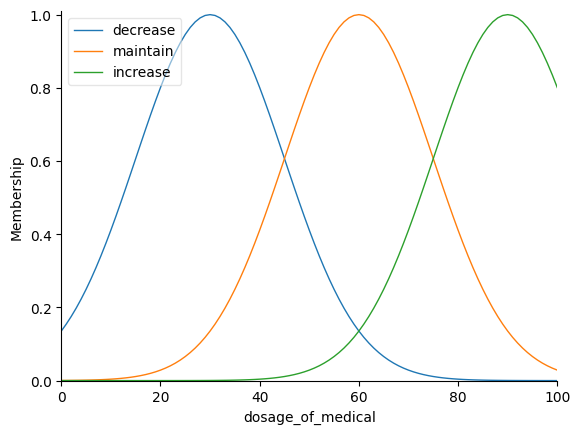

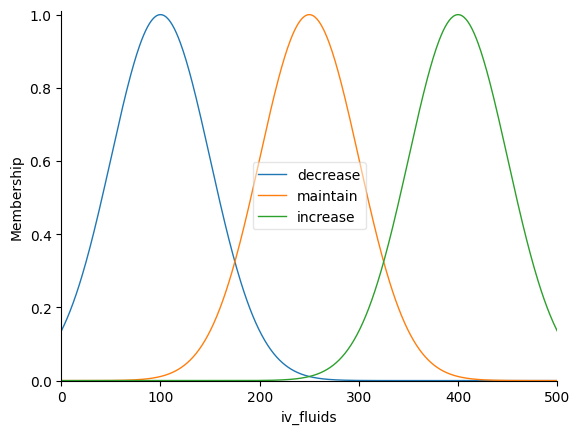

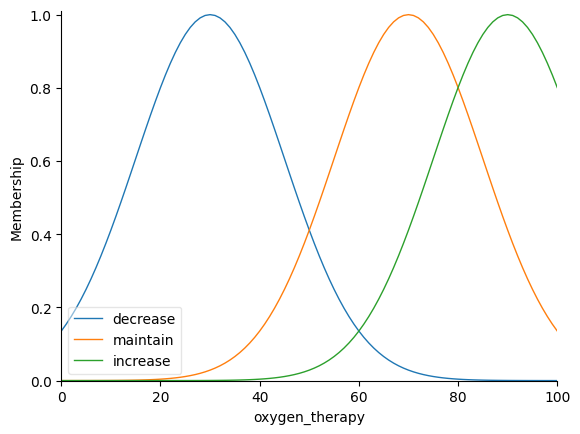

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate = ctrl.Antecedent(np.arange(40, 161, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(70, 181, 1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(35, 41, 0.1), 'body_temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(80, 101, 1), 'oxygen_saturation')
blood_sugar_level = ctrl.Antecedent(np.arange(60, 201, 1), 'blood_sugar_level')


dosage_of_medical = ctrl.Consequent(np.arange(0, 101, 1), 'dosage_of_medical')
iv_fluids = ctrl.Consequent(np.arange(0, 501, 1), 'iv_fluids')
oxygen_therapy = ctrl.Consequent(np.arange(0, 101, 1), 'oxygen_therapy')


heart_rate['low'] = fuzz.gaussmf(heart_rate.universe,55 , 10)
heart_rate['normal'] = fuzz.gaussmf(heart_rate.universe, 70, 15)
heart_rate['high'] = fuzz.gaussmf(heart_rate.universe, 120, 20)

blood_pressure['low'] = fuzz.gaussmf(blood_pressure.universe, 71, 10)
blood_pressure['normal'] = fuzz.gaussmf(blood_pressure.universe, 120, 15)
blood_pressure['high'] = fuzz.gaussmf(blood_pressure.universe, 160, 30)

body_temperature['low'] = fuzz.gaussmf(body_temperature.universe, 35, 1.5)
body_temperature['normal'] = fuzz.gaussmf(body_temperature.universe, 36, 1.5)
body_temperature['high'] = fuzz.gaussmf(body_temperature.universe, 40, 1.5)

oxygen_saturation['low'] = fuzz.gaussmf(oxygen_saturation.universe, 85, 5)
oxygen_saturation['normal'] = fuzz.gaussmf(oxygen_saturation.universe, 98, 5)

blood_sugar_level['low'] = fuzz.gaussmf(blood_sugar_level.universe, 65, 10)
blood_sugar_level['normal'] = fuzz.gaussmf(blood_sugar_level.universe, 110, 20)
blood_sugar_level['high'] = fuzz.gaussmf(blood_sugar_level.universe, 150, 30)


dosage_of_medical['decrease'] = fuzz.gaussmf(dosage_of_medical.universe, 30, 15)
dosage_of_medical['maintain'] = fuzz.gaussmf(dosage_of_medical.universe, 60, 15)
dosage_of_medical['increase'] = fuzz.gaussmf(dosage_of_medical.universe, 90, 15)

iv_fluids['decrease'] = fuzz.gaussmf(iv_fluids.universe, 100, 50)
iv_fluids['maintain'] = fuzz.gaussmf(iv_fluids.universe, 250, 50)
iv_fluids['increase'] = fuzz.gaussmf(iv_fluids.universe, 400, 50)

oxygen_therapy['decrease'] = fuzz.gaussmf(oxygen_therapy.universe, 30, 15)
oxygen_therapy['maintain'] = fuzz.gaussmf(oxygen_therapy.universe, 70, 15)
oxygen_therapy['increase'] = fuzz.gaussmf(oxygen_therapy.universe, 90, 15)

rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], (iv_fluids['increase'], dosage_of_medical['increase']))
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'],dosage_of_medical['decrease'])
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], dosage_of_medical['maintain'])

rule4 = ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'], (oxygen_therapy['increase'], dosage_of_medical['increase']))
rule5 = ctrl.Rule(body_temperature['normal'] & oxygen_saturation['normal'],dosage_of_medical['maintain'])
rule6 = ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'], (oxygen_therapy['increase'], iv_fluids['increase']))

rule7 = ctrl.Rule(blood_sugar_level['high'],dosage_of_medical['increase'])
rule8 = ctrl.Rule(blood_sugar_level['low'], dosage_of_medical['decrease'])
rule9 = ctrl.Rule(blood_sugar_level['normal'], dosage_of_medical['maintain'])

rule10 = ctrl.Rule((blood_pressure['high'] & blood_sugar_level['high'] & heart_rate['high']),
                   dosage_of_medical['decrease'])

rule11 = ctrl.Rule((blood_pressure['low'] & blood_sugar_level['low'] & heart_rate['low']),
                   (dosage_of_medical['increase'], oxygen_therapy['increase'], iv_fluids['increase']))

rule12 = ctrl.Rule((blood_pressure['high'] & blood_sugar_level['high'] & heart_rate['normal']),
                   (dosage_of_medical['decrease'], oxygen_therapy['increase']))

medical_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
medical_simulation = ctrl.ControlSystemSimulation(medical_ctrl)

dosage_of_medical.view()
iv_fluids.view()
oxygen_therapy.view()

